# Intro

* Bajamos el dataset
* Analizamos de manera basica el dataset (cantidad de filas, columnas, tipo del label (regresion, clasificacion binaria, clasificacion multiclase), etc.)
* Limpiamos el dataset (remover o hacer alguna operacion sobre los nans)
* Ingenieria de features (correr tests de correlacion, encontrar buenas features para predecir la salida, etc.)
* Creacion de train, validation y test
* Normalizar los datos
* Crear un modelo base-line que me permita obtener metricas iniciales de un modelo basico (en general, un modelo lineal)
* Crear modelos mas complejos como no lineales con deep-learning


# Load dataset

In [1]:
import pandas as pd
import numpy as np
import torch 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
dataset = pd.read_csv(r'C:\Users\Agustin\Documents\RepositorioCEIA_Git\Aprendizaje de Maquina I/class_7_wine_dataset_v2.csv')

In [2]:
device = "cpu"

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
dtypes: float64(11), int64

In [4]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375


In [5]:
len(dataset)

6497

In [6]:
dataset.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000,6497.000000
mean,3248.000000,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378,331.422657
std,1875.666681,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255,91.939412
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,1624.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,265.000000
50%,3248.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,330.000000
75%,4872.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,387.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,693.000000


Min value: 3
Max value: 9


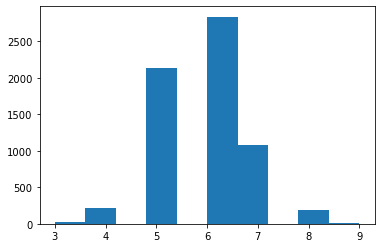

In [7]:
# data analysis of the output
quality = dataset.quality.to_numpy()
fig, ax1 = plt.subplots(1,1)
ax1.hist(quality)
print(f"Min value: {quality.min()}")
print(f"Max value: {quality.max()}")

In [8]:
dataset['quality_label'] = dataset.quality.apply(lambda label: 0 if label <=6 else 1)
print(len(dataset[dataset['quality_label'] == 0]))
print(len(dataset[dataset['quality_label'] == 1]))

5220
1277


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
 15  quality_label        

# Clean dataset

In [10]:
nans = dataset[dataset.isna().sum(axis=1) == 1]
print(nans.shape)

(30, 16)


In [11]:
ds = dataset[dataset.isna().sum(axis=1) == 0]
print(ds.shape)

(6463, 16)


# Feature engineering

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  quality_label        

In [13]:
# Tengo que transformar todas las variables/columnas categoricas en algo que mi modelo pueda utilizar para entrenar.

# Tratamiento para la variable type
print(ds.type.unique()) # mapear type a dos variables one hot encoding

y = pd.get_dummies(ds.type, prefix="type")
y.info()

['white' 'red']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   type_red    6463 non-null   uint8
 1   type_white  6463 non-null   uint8
dtypes: uint8(2)
memory usage: 63.1 KB


In [14]:
# Concatenar las dummies al dataset principal
ds = pd.concat([ds, y], axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  quality_label        

In [15]:
# Tratamiento similar para la variable vendor id
print(ds.vendor_id.unique())
print(len(ds.vendor_id.unique()))

[369 361 354 325 375 380 312 301 355 290 210 260 421 248 416 383 277 586
 413 559 234 317 318 353 305 470 381 347 396 243 232 200 358 256 374 384
 357 393 462 143 252 329 257 389 469 459 335 334 359 306 323 339 209 379
 373 203 464 276 233 288 230 331 536 254 401 478 247 348 321 206 316 268
 365 322 261 367 215 438 496 482 399 417 270 214 241 263 274 326 286 275
 279 132 385 307 218 223 352 308 471 461 269 449 265 228 445 299 345 320
 313 190 466 300 409 372 398 227 440 573 578 486 244 212 294 497 262 392
 150 196 239 194 250 351 287 245 272 506 180 390 253 282 222 235 264 266
 292 157 137 415 324 240 258 350 284 340 207 182 314 338 433 201 432 311
 437 441 439 105  72  80 360 403 114 273 395 309 291 249 140 518 562 152
 226 315 457 434 447 302 455   2 337 344 493 304 410 531 224 378 343 456
 205 208 229 570 356 293 473 425 371 362 465 450 479 332 342 382 238 430
 213 458 487 404 341 454 204 394 271 246 297 333 446 242 283 414 185 548
 540 566 336  40 211 485 220 412 391 397 387 368 30

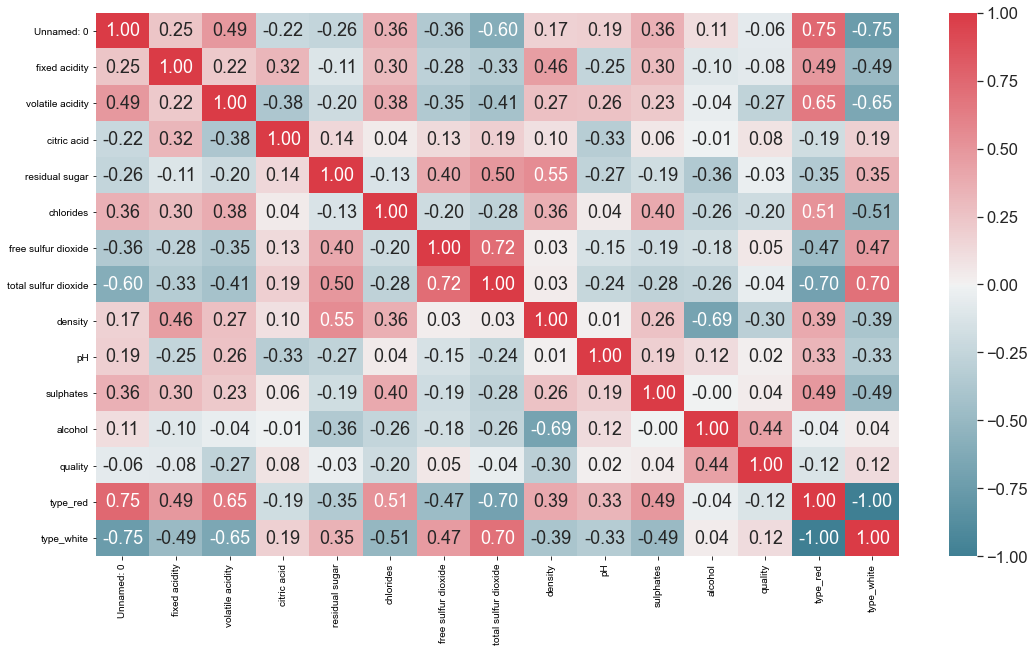

In [16]:
corr = ds.loc[:, (ds.columns != 'vendor_id') & (ds.columns != 'type') & (ds.columns != 'quality_label')].corr()
fig, ax1 = plt.subplots(1, figsize=(18,10))
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.5)

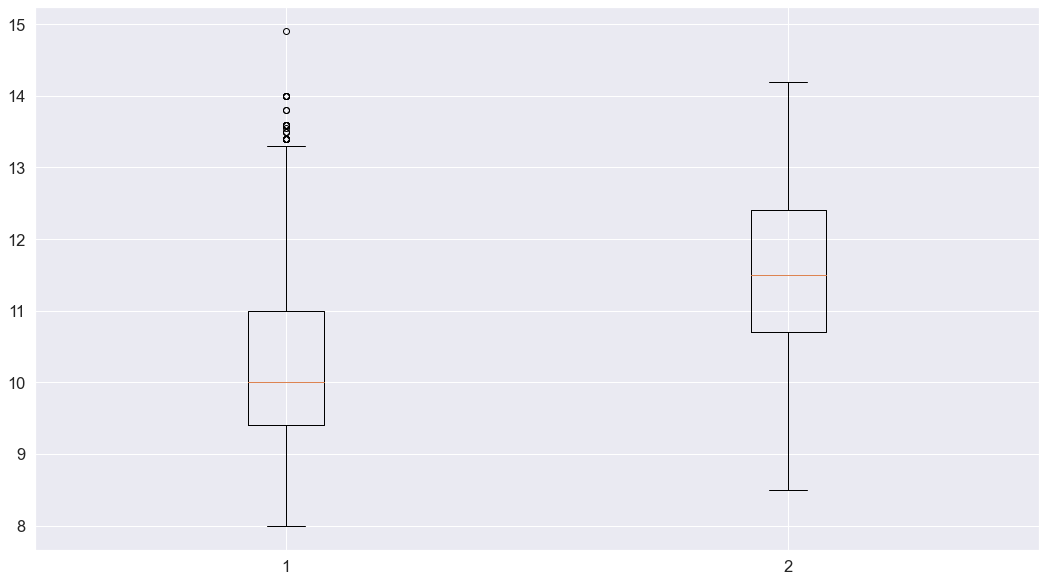

In [17]:
fig, ax1 = plt.subplots(1, figsize=(18,10))
_ = ax1.boxplot([ds.loc[dataset['quality_label'] == 0, 'alcohol'], 
                 ds.loc[dataset['quality_label'] == 1, 'alcohol']])

In [18]:
# Nos vamos a quedar con las variables que vamos a usar para hacer el fit de los modelos
vendor_id = ds['vendor_id']
final_data = ds.drop(['Unnamed: 0', 'quality_label', 'quality', 'vendor_id', 'type'], axis=1, inplace=False)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  type_red              6463 non-null   uint8  
 12  type_white            6463 non-null   uint8  
dtypes: float64(11), uint8(2)
memory usage: 618.5 KB


In [19]:
final_data = final_data.to_numpy()
label = ds.quality_label.to_numpy()

# Normalizacion de datos

In [20]:
normalized_data = (final_data - np.min(final_data, axis=0)) / (np.max(final_data, axis=0) - np.min(final_data, axis=0))
print(np.max(normalized_data, axis=0))
print(np.min(normalized_data, axis=0))
print(normalized_data)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.26446281 0.12666667 0.21686747 ... 0.11594203 0.         1.        ]
 [0.20661157 0.14666667 0.20481928 ... 0.2173913  0.         1.        ]
 [0.3553719  0.13333333 0.24096386 ... 0.30434783 0.         1.        ]
 ...
 [0.20661157 0.28666667 0.07831325 ... 0.43478261 1.         0.        ]
 [0.17355372 0.37666667 0.07228916 ... 0.31884058 1.         0.        ]
 [0.18181818 0.15333333 0.28313253 ... 0.43478261 1.         0.        ]]


# Dataset split

In [21]:
n = final_data.shape[0]
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[:int(0.8 * n)]
test_idx = idx[int(0.8 * n):]
assert len(train_idx) + len(test_idx) == len(idx)

In [22]:
# map de id the base de datos a index entre 0 y N-1
# 10000
# 1100200 -> 0
# 2456023 -> 1
# ...
# 100     -> 9999 
unique, indices, inverse = np.unique(vendor_id, return_index=True, return_inverse=True)
vendor_id_to_index = {key: value for key,value in zip(vendor_id,inverse)}
vendor_index = np.array([vendor_id_to_index[id] for id in vendor_id])
print(vendor_id_to_index[350])
print(vendor_id)
print(vendor_index)
print(len(vendor_id))
print(len(vendor_index))

263
0       369
1       361
2       354
3       325
4       375
       ... 
6491    393
6492    281
6494    371
6495    262
6496    335
Name: vendor_id, Length: 6463, dtype: int64
[282 274 267 ... 284 175 248]
6463
6463


In [23]:
vendor_index_train = vendor_index[train_idx]
X_train = final_data[train_idx,:]
y_train = label[train_idx]

vendor_index_test = vendor_index[test_idx]
X_test = final_data[test_idx,:]
y_test = label[test_idx]

In [24]:
print(vendor_index_train.shape)
print(X_train.shape)
print(y_train.shape)
print(vendor_index_test.shape)
print(X_test.shape)
print(y_test.shape)

(5170,)
(5170, 13)
(5170,)
(1293,)
(1293, 13)
(1293,)


# Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Random forest

# Deep learning

In [25]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

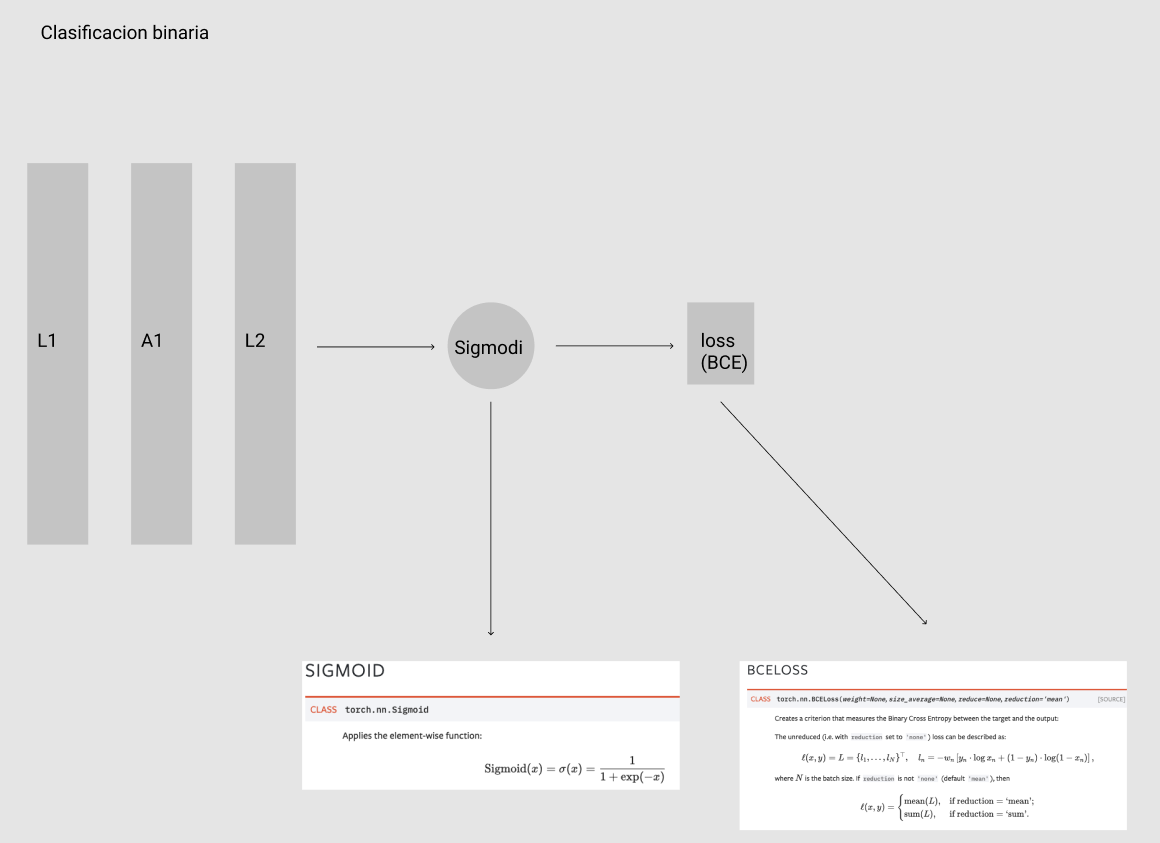

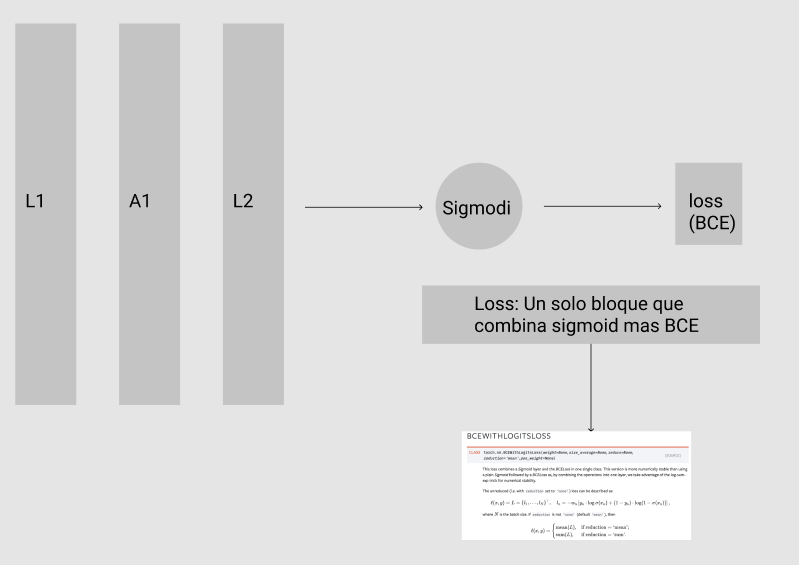

# DL con Embeddings

In [26]:
class CustomDatasetWithEmbedding(Dataset):
    def __init__(self, X, vendor_idx, Y):
        super().__init__()
        self.vendor_idx = vendor_idx
        self.X = X
        self.Y = Y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx,:], self.vendor_idx[idx], self.Y[idx]

In [27]:
training = CustomDatasetWithEmbedding(X_train, vendor_index_train, y_train)
testing = CustomDatasetWithEmbedding(X_test, vendor_index_test, y_test)

In [28]:
training_dataloader = DataLoader(training, batch_size=128, shuffle=True)
test_dataloader = DataLoader(testing, batch_size=128, shuffle=True)

In [29]:
class NNet(torch.nn.Module):
    def __init__(self, number_of_vendors, embedding_dim):
        super().__init__()
        self.embedding = torch.nn.Embedding(num_embeddings=number_of_vendors, embedding_dim=embedding_dim)
        self.linear_1 = torch.nn.Linear(in_features=(13 + embedding_dim), out_features=200, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=200, out_features=100, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=100, out_features=1, bias=True)
    
    def forward(self, x, vendor_idx):
        vendor_emb = self.embedding(vendor_idx)
        final_input = torch.cat([x, vendor_emb], dim=1)
        z1 = self.linear_1(final_input)
        a1 = self.relu_1(z1)
        z2 = self.linear_2(a1)
        a2 = self.relu_2(z2)
        y = self.linear_3(a2)
        return y

In [30]:
nnet = NNet(number_of_vendors=len(unique), embedding_dim=16)

In [31]:
print(nnet)

NNet(
  (embedding): Embedding(500, 16)
  (linear_1): Linear(in_features=29, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=1, bias=True)
)


In [32]:
criterion = torch.nn.BCEWithLogitsLoss(reduction='sum') # criterion, is my lost function
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01) # is my optimizer

In [35]:
nnet.to(device)

for epoch in range(20):

    running_loss = 0
    nnet.train()
    for i, data in enumerate(training_dataloader):

        # batch
        x, vendor_idx, y = data

        #vendor_idx = vendor_idx.to(device).reshape(-1,1)
        x = x.to(device).float()
        y = y.to(device).float().reshape(-1,1)

        # set gradient to zero
        optimizer.zero_grad()

        # forward
        y_hat = nnet(x, vendor_idx)

        # loss
        loss = criterion(y_hat, y)

        # backward
        loss.backward()

        # update of parameters
        optimizer.step()

        # compute metrics and statistics
        running_loss += loss.item()
    
    nnet.eval()
    with torch.no_grad():
        nnet_test_scores = []
        truth = []
        for i, data in enumerate(test_dataloader):
            # batch
            x, vendor_idx, y = data
            x = x.to(device).float()
            y = y.to(device).float().reshape(-1,1)

            # forward 
            y_hat = nnet(x, vendor_idx)
            y_hat = torch.sigmoid(y_hat)

            # accumulate data
            truth += list(y.detach().numpy()) 
            nnet_test_scores += list(y_hat.detach().numpy())

        fpr, tpr, thresholds = metrics.roc_curve(truth, nnet_test_scores)
        auc = metrics.auc(fpr, tpr)
        print(f"Epoch = {epoch} | loss = {running_loss / len(training)} | auc = {auc}")

Epoch = 0 | loss = 0.31537626209295927 | auc = 0.9805910809824432
Epoch = 1 | loss = 0.05718519842140449 | auc = 0.9908371576552442
Epoch = 2 | loss = 0.020233296477587127 | auc = 0.9923397084973715
Epoch = 3 | loss = 0.008972132623887385 | auc = 0.990646912199781
Epoch = 4 | loss = 0.0068895008375353005 | auc = 0.9940829780790645
Epoch = 5 | loss = 0.0008713624514891573 | auc = 0.9944828817915686
Epoch = 6 | loss = 0.0005026345311464089 | auc = 0.9941645118456915
Epoch = 7 | loss = 0.000312479411664363 | auc = 0.9943547573011546
Epoch = 8 | loss = 0.00012365113795199926 | auc = 0.9944867643518842
Epoch = 9 | loss = 8.667197168085947e-05 | auc = 0.9945488853169334
Epoch = 10 | loss = 6.741769120954626e-05 | auc = 0.9946575970057695
Epoch = 11 | loss = 5.397113000458859e-05 | auc = 0.9947663086946057
Epoch = 12 | loss = 4.429540624373684e-05 | auc = 0.9948361947802858
Epoch = 13 | loss = 3.804555230339848e-05 | auc = 0.9948556075818638
Epoch = 14 | loss = 3.177303754084165e-05 | auc = 0